In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
tickers = ['AMZN', 'MSFT', 'AAPL', 'GOOGL', 'NVDA']

start_date = '2010-01-01'
end_date = '2024-09-10'

stock_data = yf.download(tickers, start_date, end_date)

[*********************100%***********************]  5 of 5 completed


In [4]:
stock_data['Adj Close'].head()

Ticker,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2010-01-04 00:00:00+00:00,6.454505,6.6950,15.645692,23.347319,0.423988
2010-01-05 00:00:00+00:00,6.465667,6.7345,15.576794,23.354858,0.430179
2010-01-06 00:00:00+00:00,6.362819,6.6125,15.184123,23.211533,0.432931
2010-01-07 00:00:00+00:00,6.351057,6.5000,14.830644,22.970142,0.424447
2010-01-08 00:00:00+00:00,6.393281,6.6760,15.028353,23.128561,0.425364


In [5]:
returns = stock_data['Adj Close'].pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [7]:
mean_returns*100

Ticker
AAPL     0.111275
AMZN     0.109746
GOOGL    0.075747
MSFT     0.090392
NVDA     0.190502
dtype: float64

In [8]:
cov_matrix

Ticker,AAPL,AMZN,GOOGL,MSFT,NVDA
Ticker,,,,,
AAPL,0.000312,0.000175,0.000168,0.000168,0.000247
AMZN,0.000175,0.000427,0.000212,0.000190,0.000274
GOOGL,0.000168,0.000212,0.000296,0.000178,0.000247
MSFT,0.000168,0.000190,0.000178,0.000261,0.000261
NVDA,0.000247,0.000274,0.000247,0.000261,0.000824


In [11]:
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

In [12]:
weights

array([0.30914925, 0.19751659, 0.27600437, 0.02484846, 0.19248133])

In [15]:
returns.head()

Ticker,AAPL,AMZN,GOOGL,MSFT,NVDA,portfolio
Date,,,,,,
2010-01-05 00:00:00+00:00,0.001729,0.005900,-0.004404,0.000323,0.014602,0.003303
2010-01-06 00:00:00+00:00,-0.015907,-0.018116,-0.025209,-0.006137,0.006397,-0.014375
2010-01-07 00:00:00+00:00,-0.001849,-0.017013,-0.023280,-0.010400,-0.019597,-0.014388
2010-01-08 00:00:00+00:00,0.006648,0.027077,0.013331,0.006897,0.002161,0.011670
2010-01-11 00:00:00+00:00,-0.008821,-0.024041,-0.001512,-0.012720,-0.014016,-0.010907


In [16]:
expected_return = np.sum(weights*mean_returns) * 252

In [17]:
print(f'Rendement attendu {expected_return}')

Rendement attendu 0.2920630090829274


In [20]:
T = 252
M = 100


mean_returns_matrix = np.full(shape=(T, len(weights)), fill_value=mean_returns).T


portfolio_simulations = np.zeros(shape=(T, M))


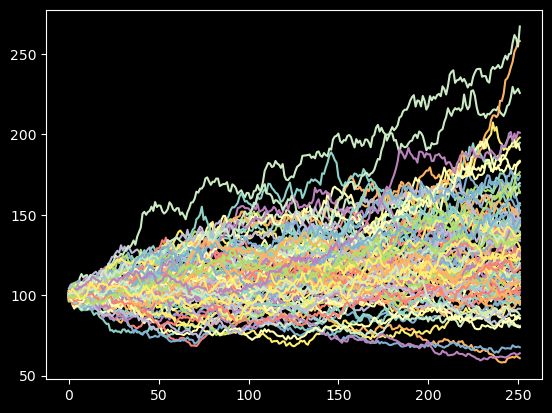

In [46]:
for i in range(0, M):
    
    
    #correlated_random_returns = np.random.multivariate_normal(mean_returns, cov_matrix, T)
    
    
    Z = np.random.normal(size=(T, len(weights)))
    
    cholesky_decomposition = np.linalg.cholesky(cov_matrix)
    
    correlated_random_returns = mean_returns_matrix + np.inner(cholesky_decomposition, Z)
    
    portfolio_simulations[:, i] = np.cumprod(np.inner(weights, correlated_random_returns.T) + 1) * 100
    
    
    
plt.plot(portfolio_simulations);

In [37]:
cholesky_decomposition = np.linalg.cholesky(cov_matrix)

In [38]:
L = cholesky_decomposition

L_T = cholesky_decomposition.T



L @ L_T

array([[0.00031167, 0.00017526, 0.00016753, 0.00016827, 0.00024706],
       [0.00017526, 0.00042739, 0.00021236, 0.00019002, 0.00027369],
       [0.00016753, 0.00021236, 0.00029649, 0.0001779 , 0.00024743],
       [0.00016827, 0.00019002, 0.0001779 , 0.00026148, 0.00026104],
       [0.00024706, 0.00027369, 0.00024743, 0.00026104, 0.00082424]])

In [39]:
cov_matrix

Ticker,AAPL,AMZN,GOOGL,MSFT,NVDA
Ticker,,,,,
AAPL,0.000312,0.000175,0.000168,0.000168,0.000247
AMZN,0.000175,0.000427,0.000212,0.000190,0.000274
GOOGL,0.000168,0.000212,0.000296,0.000178,0.000247
MSFT,0.000168,0.000190,0.000178,0.000261,0.000261
NVDA,0.000247,0.000274,0.000247,0.000261,0.000824


In [72]:
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

var = weights.T @ cov_matrix @ weights



std = np.sqrt(var) * np.sqrt(252)



sharpe_ratio = (expected_return - 0.01) / std 


print(f"sharpe ratio = {round(sharpe_ratio,2)}")

sharpe ratio = 1.09
